In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import time
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
interpreter = tf.lite.Interpreter(
    model_path=r"C:\Users\adity\Downloads\Code\Teknik_Gabungan\student_kd_fp16.tflite"
)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_shape = input_details[0]['shape']
input_dtype = input_details[0]['dtype']

print("✅ TFLite model loaded")
print("Input shape :", input_shape)
print("Input dtype :", input_dtype)

✅ TFLite model loaded
Input shape : [  1 224 224   3]
Input dtype : <class 'numpy.float32'>


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [3]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (input_shape[2], input_shape[1]))
    img = img.astype(np.float32)

    # MobileNetV3 preprocessing [-1, 1]
    img = preprocess_input(img)

    return np.expand_dims(img, axis=0)


In [4]:
TEST_DIR = r"C:\Users\adity\Downloads\Tomato Leaf Disease Dataset\TomatoDataset"

y_true = []
y_pred = []
inference_times = []

class_names = sorted(os.listdir(TEST_DIR))
assert len(class_names) == 10, "Jumlah kelas harus 10"

# Warm-up (penting)
dummy = np.random.rand(*input_shape).astype(input_dtype)
for _ in range(10):
    interpreter.set_tensor(input_details[0]['index'], dummy)
    interpreter.invoke()

for true_label, class_name in enumerate(class_names):
    class_path = os.path.join(TEST_DIR, class_name)

    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        input_data = preprocess_image(img_path)

        start = time.perf_counter()
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        end = time.perf_counter()

        output = interpreter.get_tensor(output_details[0]['index'])[0]
        pred_label = np.argmax(output)

        y_true.append(true_label)
        y_pred.append(pred_label)
        inference_times.append(end - start)


In [5]:
import numpy as np

inference_times = np.array(inference_times)

print("⏱️ Inference Time (second)")
print(f"Average : {inference_times.mean():.6f} s")
print(f"Min     : {inference_times.min():.6f} s")
print(f"Max     : {inference_times.max():.6f} s")
print(f"Std     : {inference_times.std():.6f} s")


⏱️ Inference Time (second)
Average : 0.003461 s
Min     : 0.003167 s
Max     : 0.005694 s
Std     : 0.000360 s


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

In [7]:
acc  = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average="weighted")
rec  = recall_score(y_true, y_pred, average="weighted")
f1   = f1_score(y_true, y_pred, average="weighted")
cm = confusion_matrix(y_true, y_pred)



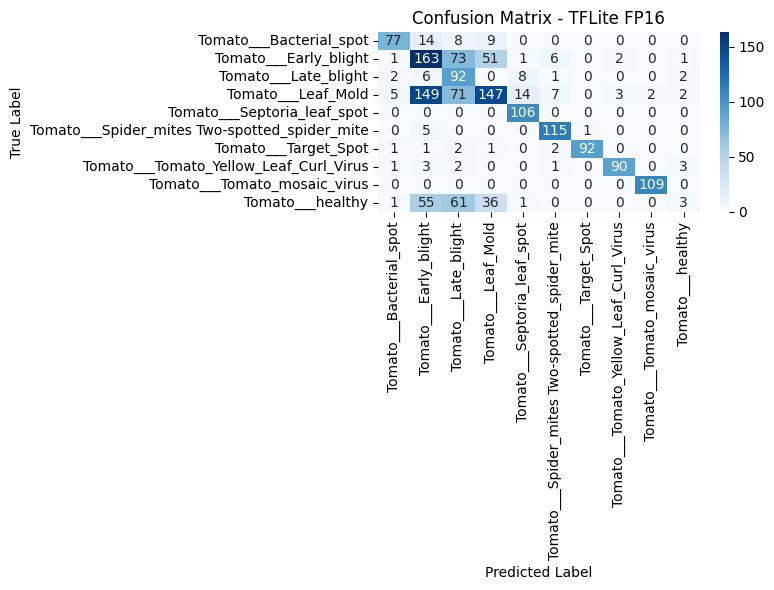

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - TFLite FP16")
plt.tight_layout()
plt.show()


In [9]:
print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Accuracy: 0.617775015537601

Classification Report:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.88      0.71      0.79       108
                        Tomato___Early_blight       0.41      0.55      0.47       298
                         Tomato___Late_blight       0.30      0.83      0.44       111
                           Tomato___Leaf_Mold       0.60      0.37      0.46       400
                  Tomato___Septoria_leaf_spot       0.82      1.00      0.90       106
Tomato___Spider_mites Two-spotted_spider_mite       0.87      0.95      0.91       121
                         Tomato___Target_Spot       0.99      0.93      0.96        99
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.95      0.90      0.92       100
                 Tomato___Tomato_mosaic_virus       0.98      1.00      0.99       109
                             Tomato___healthy       0.27      0.02      0.04 

In [10]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

# =====================
# LOAD TFLITE MODEL
# =====================
interpreter = tf.lite.Interpreter(
    model_path=r"C:\Users\adity\student_kd_fp16.tflite"
)
interpreter.allocate_tensors()

input_details  = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_shape = input_details[0]["shape"]
input_dtype = input_details[0]["dtype"]

# =====================
# PREPROCESS FUNCTION (IDENTIK TRAINING)
# =====================
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (input_shape[2], input_shape[1]))
    img = img.astype(np.float32)
    img = preprocess_input(img)

    return np.expand_dims(img, axis=0)

# =====================
# DATASET LUAR
# =====================
TEST_DIR = r"C:\Users\adity\Downloads\Tomato Leaf Disease Dataset\TomatoDataset"
class_names = sorted(os.listdir(TEST_DIR))

# =====================
# SIMPAN HASIL SALAH PREDIKSI
# =====================
misclassified = []

for true_label, class_name in enumerate(class_names):
    class_path = os.path.join(TEST_DIR, class_name)

    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        input_data = preprocess_image(img_path)

        interpreter.set_tensor(input_details[0]["index"], input_data)
        interpreter.invoke()

        output = interpreter.get_tensor(output_details[0]["index"])[0]
        pred_label = np.argmax(output)

        if pred_label != true_label:
            misclassified.append({
                "img_path": img_path,
                "true": class_names[true_label],
                "pred": class_names[pred_label]
            })

print(f"Jumlah gambar salah prediksi: {len(misclassified)}")


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


Jumlah gambar salah prediksi: 615


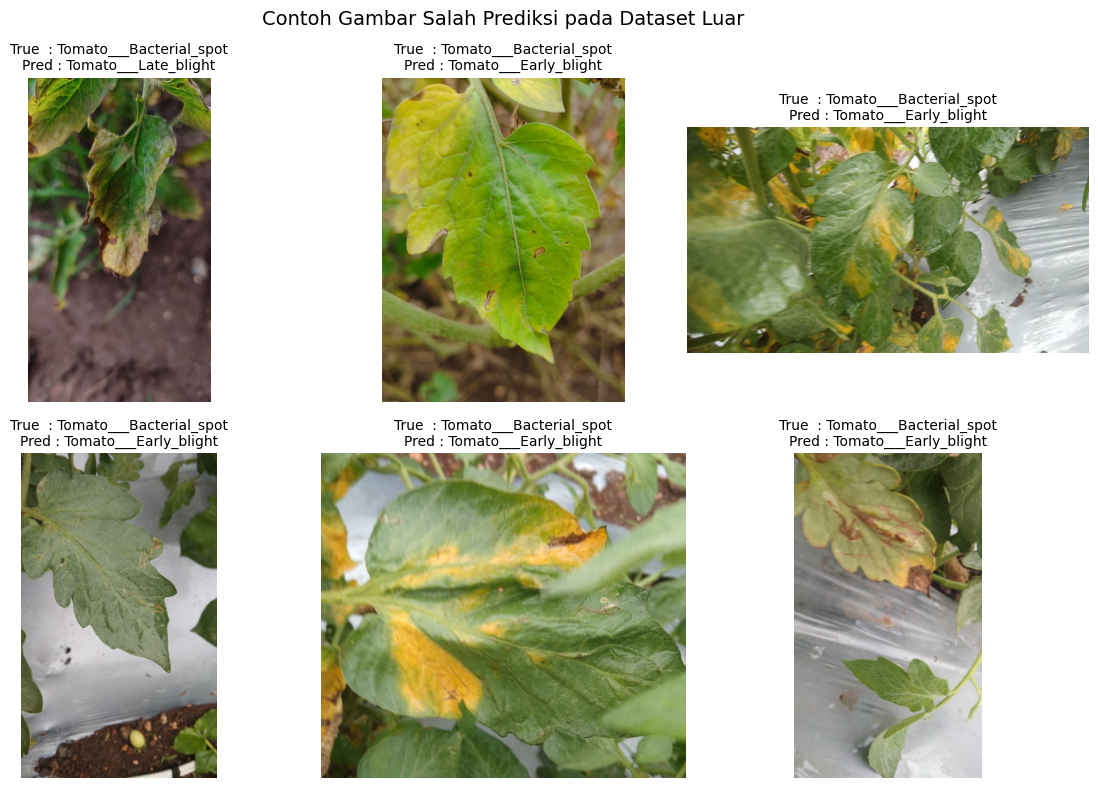

In [11]:
# =====================
# TAMPILKAN CONTOH SALAH PREDIKSI
# =====================
NUM_SAMPLES = 6
samples = misclassified[:NUM_SAMPLES]

plt.figure(figsize=(12, 8))

for i, sample in enumerate(samples):
    img = cv2.imread(sample["img_path"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(
        f"True  : {sample['true']}\n"
        f"Pred : {sample['pred']}",
        fontsize=10
    )
    plt.axis("off")

plt.suptitle("Contoh Gambar Salah Prediksi pada Dataset Luar", fontsize=14)
plt.tight_layout()
plt.show()


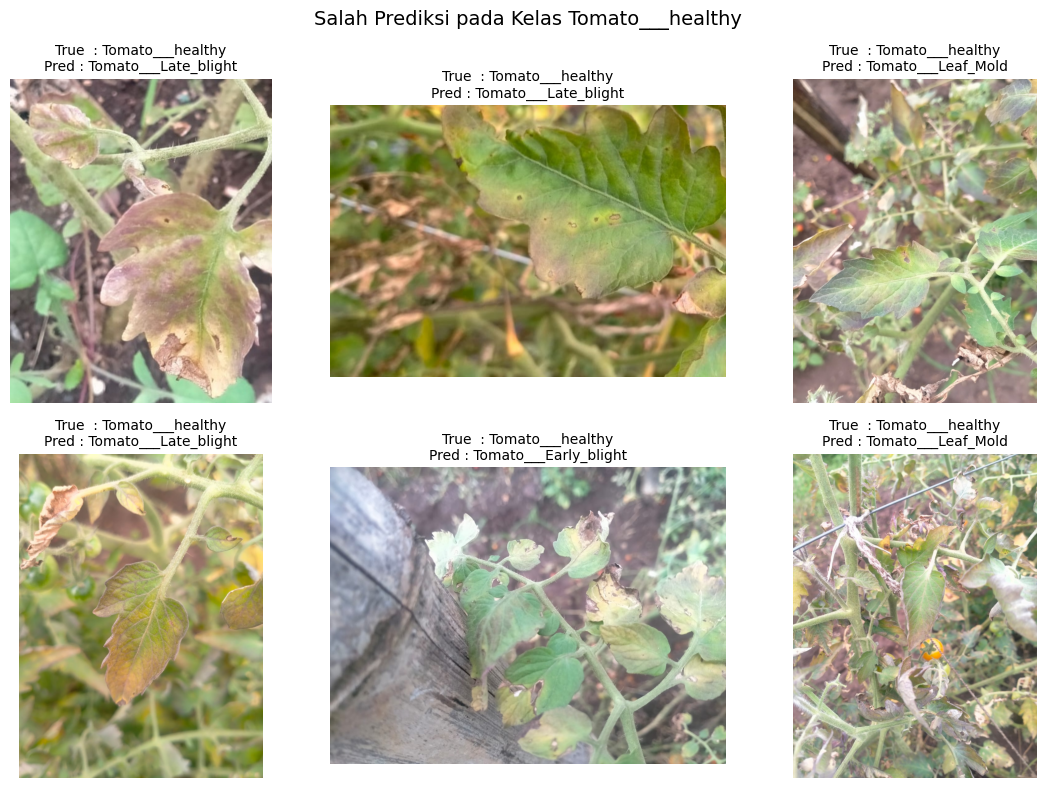

In [12]:
target_class = "Tomato___healthy"

filtered = [
    x for x in misclassified if x["true"] == target_class
][:6]

plt.figure(figsize=(12, 8))

for i, sample in enumerate(filtered):
    img = cv2.imread(sample["img_path"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(
        f"True  : {sample['true']}\n"
        f"Pred : {sample['pred']}",
        fontsize=10
    )
    plt.axis("off")

plt.suptitle(f"Salah Prediksi pada Kelas {target_class}", fontsize=14)
plt.tight_layout()
plt.show()
